In [6]:
from utils.EDA.analysis import *
from utils.EDA.visualize import *

In [149]:
def LinearReg(data, target, *features):
    y = np.array(data[target])[np.newaxis].T

    X = np.ones([len(data), 1])
    for feature in features:
        X = np.hstack((X, np.array(data[feature])[np.newaxis].T))

    w, resid, rank, s = np.linalg.lstsq(X, y)

    print("w{} : {}".format("Const", w[0]), end = " ")
    
    for i in range(len(w)-1):
        print("w{} : {}".format(features[i], w[i+1]), end = " ")
        
    RMSE = np.sqrt(resid / len(data))
    print("\n RMSE : {}".format(RMSE))
    print("rank : {}".format(rank))
    
    # draw chart
    # 예측치와 실제치과의 관계표시(scatter plot)
    predict = np.dot(X, w)
    
    plt.scatter(y, predict)
    plt.xlabel("target value")
    plt.ylabel("predict value")
    plt.xlim(data[target].min(), data[target].max())
    plt.show()

In [2]:
plt.style.use("ggplot")

In [3]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

In [7]:
# split datas into quantative and categorical
list_quanToqual = ["MSSubClass", "OverallQual", "OverallCond", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "MoSold", "YrSold"]

df_train_quan = extractQuanFromDF(df_train, 'Id', 'SalePrice', list_quanToqual)
df_train_qual = extractQualFromDF(df_train, include_list = list_quanToqual)

# LinearRegression

wConst : [-103449.38429473] wOverallQual : [ 25317.47490684] w1stFlrSF : [ 11.29093204] wGrLivArea : [ 43.38331226] wGarageArea : [ 56.67984178] wTotalBsmtSF : [ 22.95180124] 
 RMSE : [ 39056.72334924]
rank : 6


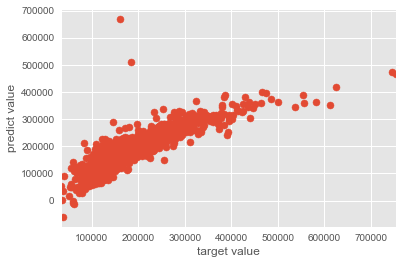

In [150]:
LinearReg(df_train, "SalePrice", "OverallQual", "1stFlrSF", "GrLivArea", "GarageArea", "TotalBsmtSF")

523, 1298

# cross validation

In [147]:
def crossValidation(num, data, target, *features):
    rmses = []
    
    # 데이터프래임에서 target과 features 추출 
    data = data[[*features, target]]
    
    # 데이터프래임 num 갯수로 분할
    remain = data.shape[0] % num
    data_set = np.split(data.values[:data.shape[0]-remain], num)
    data_set[num-1] = np.vstack([data_set[num-1], data.values[data.shape[0]-remain:]])
    
    # 각 fold로 계산하여 rmse를 계산
    for i in range(num):
        
        # test_set과 train_set 제작
        test_set = data_set[i] # test set 

        if (i==0): # train set
            train_set = data_set[1:]
        elif (i==9):
            train_set = data_set[:num-1]
        else:
            train_set = data_set[:i]
            train_set += data_set[i+1:]
        train_set = np.concatenate(train_set)
        
        # train_set으로 linear regression 모델 훈련
        y = train_set[:, -1][np.newaxis].T
        X = np.ones([train_set.shape[0], 1])
        X = np.hstack((X, train_set[:, :train_set.shape[1]-1]))
        
        w, resid, rank, s = np.linalg.lstsq(X, y)
        
        # test_set으로 predict 계산 및 target 생성
        test_X = np.hstack((np.ones([test_set.shape[0], 1]), test_set[:, :test_set.shape[1]-1]))
        predict_test = np.dot(test_X, w).T[0]
        target_test = test_set[:,-1]
        
        # rmse 계산
        rss = np.square(predict_test - target_test).sum()
        rmses.append(np.sqrt(rss / test_X.shape[0]))    
    
    # rmse_avr 계산
    rmse_avr = sum(rmses) / num
    
    # print rmse
    for idx, rmse in enumerate(rmses):
        print("test{} : {:1.2f}".format(idx, rmse), end = " ")
    
    print("\n average of rmse : {:1.2f}".format(rmse_avr))
        

In [148]:
crossValidation(11, df_train, "SalePrice", "Id", "OverallQual", "1stFlrSF")

test0 : 37833.42 test1 : 42833.64 test2 : 37199.61 test3 : 48471.78 test4 : 35416.84 test5 : 55872.03 test6 : 44496.32 test7 : 40347.23 test8 : 54162.22 test9 : 45906.95 test10 : 37885.38 
 average of rmse : 43675.04
